In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Setting path location to import data set
path = r'/Users/thaliagiraldo/Documents/Nov 2023 Instacart Basket Analysis'

In [3]:
#Importing file 
ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_merged_update.pkl'))

<Axes: xlabel='orders_day_of_week'>

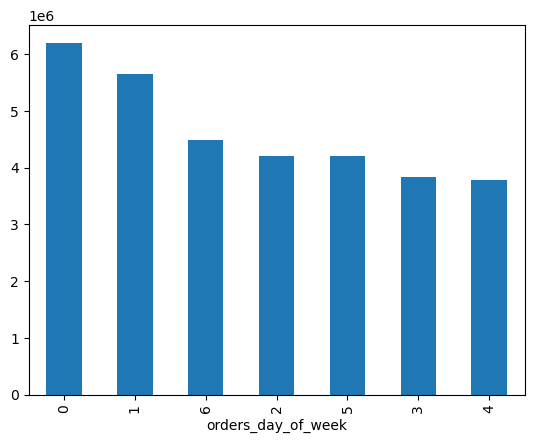

In [4]:
#Create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

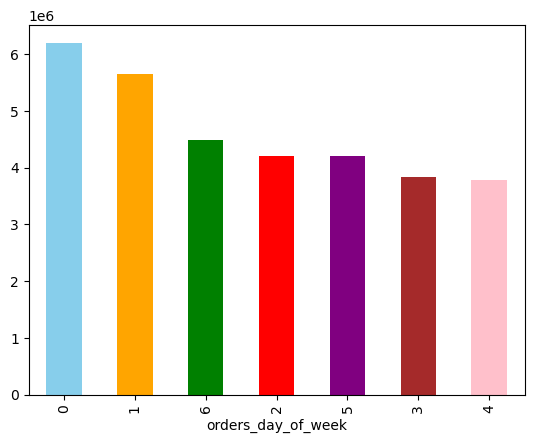

In [5]:
#Adding color to chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])


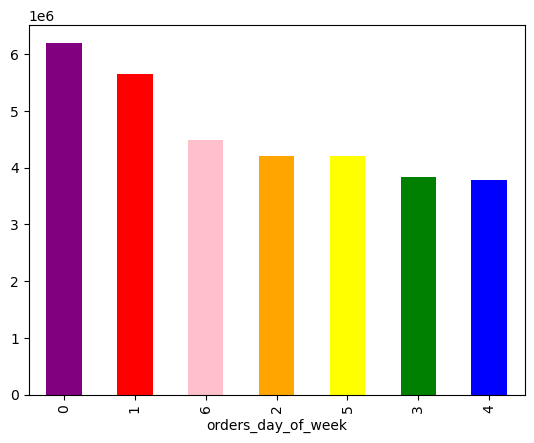

In [6]:
#Save bar chart 
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

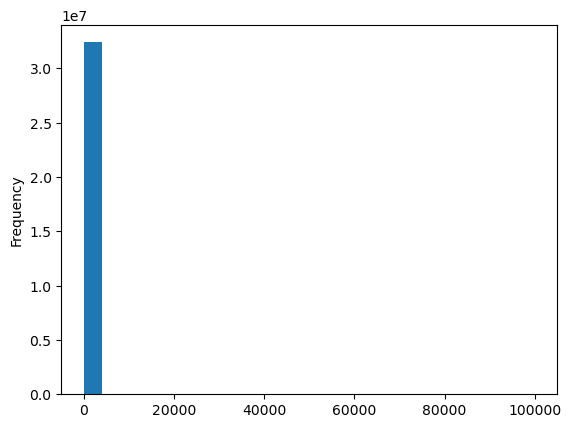

In [8]:
#Create a histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

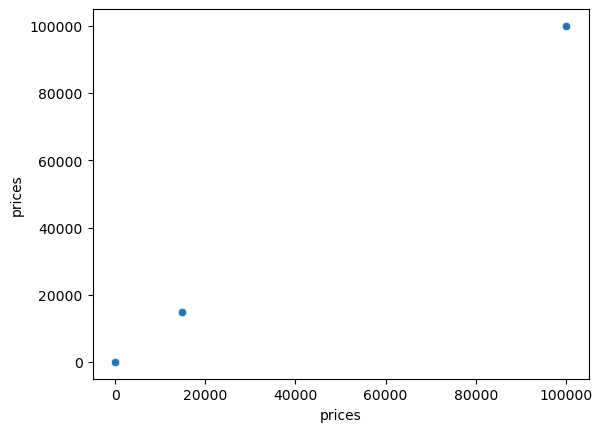

In [9]:
#Create a scatterplot to identify any outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [10]:
#Locates .loc Price values greater than $100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days_since_last_order,Frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most_orders,40,Regular customer,108.648299,High spender,5.0,Frequent_customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Average_orders,40,Regular customer,108.648299,High spender,5.0,Frequent_customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average_orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest day,Average_orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Second busiest day,Average_orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest day,Average_orders,39,Regular customer,1106.743956,High spender,4.0,Frequent_customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest day,Average_orders,39,Regular customer,1106.743956,High spender,4.0,Frequent_customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Second slowest day,Average_orders,15,Regular customer,451.153540,High spender,5.0,Frequent_customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Second slowest day,Average_orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [11]:
#Turned all prices above 100 to NaN
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [12]:
ords_prods_merge['prices'].max()

25.0

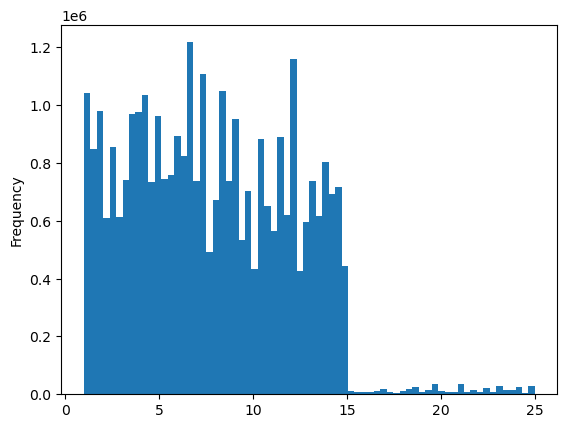

In [13]:
#Creating a histogram with updated bins 
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [14]:
#Saving histo
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [15]:
#Sampling Data - setting a seed and choosing the split
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [16]:
# - results will show whether or not each value is less than or each to 70% - part or not part of the sample we're testing
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
#There are 32 million numbers, same number as the many rows. Each fo these numebrs represent a row
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [18]:
#Stores 70% of sample in the big frame. Whether or not the random number is greater than or equal to .7/ that's 70 of the dataframe
#70% of numbers are on big dataframe
big = ords_prods_merge[dev]

#Stores 30% of sample in small df
small = ords_prods_merge[~dev]

In [19]:
len(ords_prods_merge)

32404859

In [20]:
len(big)+len(small)

32404859

In [21]:
df_2 = small[['orders_day_of_week','prices']]

/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thaliagiraldo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

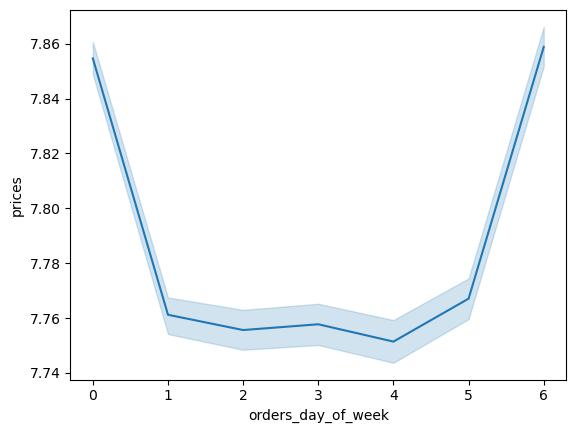

In [22]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [23]:
#Saving line graph
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))